# Rain Cloud Plot

# Introduction

When examining how the different points of a distribution are distributed, it is common to use a **box plot**. This allows us to quickly see five measures that describe our data set, as well as intuiting the morphology and symmetry. However, this type of plot does not allow us to see if there are clusters of data that form a high density of points within the distribution. The **rain cloud plot** gives us the same information as the box plot, but with the addition of a view of how the observed data set is distributed.

This study shows a quick example of this type of graph. The famous *Titanic* dataset has been used for this purpose. As we want to analyse as wide a distribution of numerical values as possible, we will use the age of the passengers. This distribution will be examined along two axes or perspectives, the survival of the shipwrecked passengers and the type of class assigned to them. For the latter, we will only analyse the passengers who were saved. In this way, we will try to see with the graphs how they were distributed according to age and the class in which the survivors were travelling.

## Dataset link
https://www.kaggle.com/datasets/brendan45774/test-file?resource=download



In [1]:
#@title
# install ptitprince library in the workspace.

!pip install ptitprince

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.1/283.1 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.9/52.9 kB 5.5 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


In [2]:
# lib needed in this project
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.collections as clt
import ptitprince as pt

sns.set(style="whitegrid",font_scale=1)

In [3]:
# Load the file and first rows
titanic = pd.read_csv('tested.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# Mainly columns selected
df = titanic[['PassengerId', 'Age', 'Pclass', 'Sex', 'Survived']]

import warnings
warnings.filterwarnings('ignore')

# Adding survived label
df['Survived_Id'] = df['Survived']
df['Survived'] = df.apply(lambda x: "yes" if x['Survived_Id'] == 1 else "no", axis=1)
df.head()

,PassengerId,Age,Pclass,Sex,Survived,Survived_Id
0,892,34.5,3,male,no,0
1,893,47.0,3,female,yes,1
2,894,62.0,2,male,no,0
3,895,27.0,3,male,no,0
4,896,22.0,3,female,yes,1


## Bloxplot distribution

<Axes: xlabel='Survived', ylabel='Age'>

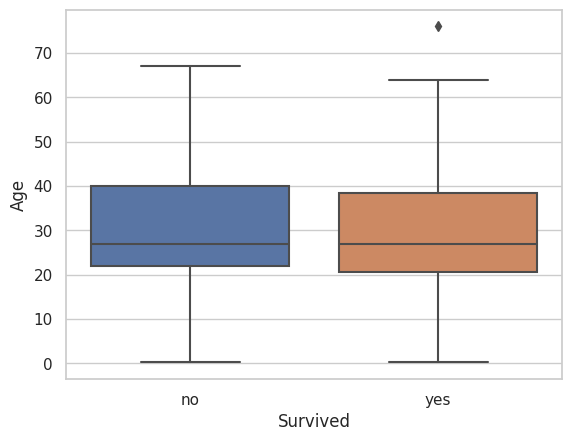

In [5]:
sns.boxplot(x = "Survived", y = "Age", data = df)

In [6]:
# Drowing victings by passanger class
# Dataset generation

df_yes =df[df['Survived'] == 'yes']
df_yes.head()

,PassengerId,Age,Pclass,Sex,Survived,Survived_Id
1,893,47.0,3,female,yes,1
4,896,22.0,3,female,yes,1
6,898,30.0,3,female,yes,1
8,900,18.0,3,female,yes,1
12,904,23.0,1,female,yes,1


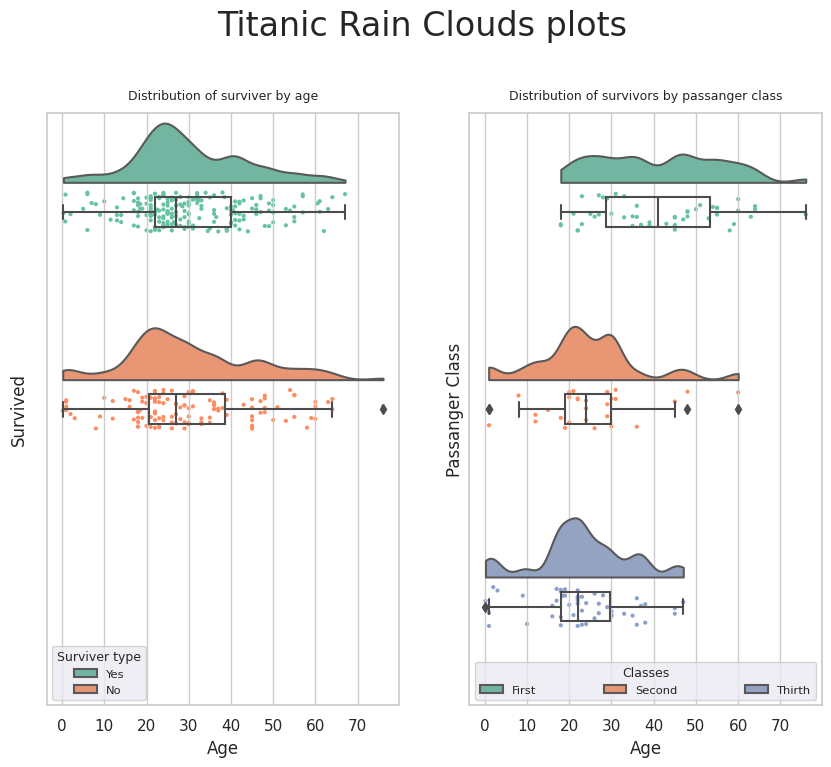

In [7]:
from matplotlib import rcParams

# General configuration
pal = 'Set2'
fig, axes = plt.subplots(1, 2, figsize=(10,8), sharey=True)
sns.set(font_scale=0.75)

# Fig 1

dx = 'Age'
dy = 'Survived'
ort = 'h'

# Violin plot
ax1 = pt.half_violinplot(ax = axes[0],
                        x = dx, 
                        y = dy, 
                        data = df, 
                        palette = pal, 
                        bw = .2, 
                        cut = 0.,
                        scale = "area", 
                        width = .6, 
                        inner = None, 
                        orient = ort)
# Adding the rain into the plot
# The jitter parameter controls the plot wide
ax1 =sns.stripplot(ax = axes[0], 
                x = dx, y = dy, 
                data = df, 
                palette = pal, 
                edgecolor = "white",
                size = 3, 
                jitter = 1,
                zorder = 0, 
                orient = ort)
# Adding the boxplot with quartiles
ax1 = sns.boxplot(ax = axes[0], 
                x = dx, y = dy, 
                data = df,
                width = 0.15, 
                boxprops = {'facecolor':'none', "zorder":10}, 
                orient = ort)

ax1.set(yticklabels = [])

ax1.legend(title = 'Surviver type', loc = 'lower left', labels = ['Yes', 'No'])
axes[0].set_title('Distribution of surviver by age', pad = 10)

# Fig 2
dx = 'Age'
dy = 'Pclass'
ort = 'h'

# Violin plot
ax2 = pt.half_violinplot(ax = axes[1],
                        x = dx, 
                        y = dy, 
                        data = df_yes, 
                        palette = pal, 
                        bw = .2, 
                        cut = 0.,
                        scale = "area", 
                        width = .6, 
                        inner = None, 
                        orient = ort)

# Adding the rain into the plot
# The jitter parameter controls the plot wide
ax2 = sns.stripplot(ax = axes[1], 
                x = dx, y = dy, 
                data = df_yes, 
                palette = pal, 
                edgecolor = "white",
                size = 3, 
                jitter = 1,
                zorder = 0, 
                orient = ort)
# Adding the boxplot with quartiles
ax2 = sns.boxplot(ax = axes[1], 
                x = dx, y = dy, 
                data = df_yes,
                width = 0.15, 
                boxprops = {'facecolor':'none', "zorder":10}, 
                orient = ort)

axes[1].set_title('Distribution of survivors by passanger class', pad = 10)
ax2.set(yticklabels = [])
ax2.set(ylabel= 'Passanger Class')
ax2.legend(title = 'Classes', loc = 'lower right', labels = ['First', 'Second', 'Thirth'], mode = "expand", ncol = 3)

plt.subplots_adjust(top=0.85)

fig.suptitle('Titanic Rain Clouds plots', fontsize = 24)
plt.show()

# Bibliografy
https://towardsdatascience.com/making-it-rain-with-raincloud-plots-496c39a2756f